# Stock Analysis of Recession Resilient Companies

The goal for this code is to find stocks that have been resilient to past major US recessions, analyze what they have in common and use this information to pick which ones are most likely to keep on staying afloat during economic downturns.

In [1]:
#Import pandas for functions and datareading
#Import MatplotLib for plotting
from pandas_datareader import data
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Function to provide financial data when called
def readmydata(tickers, start_date, end_date):
    financial_data = data.DataReader(tickers, 'yahoo', start_date, end_date)
    df = pd.DataFrame(financial_data)
    df.columns = df.columns
    output = df.stack(level=-1)
    return output

In [3]:
#Function takes as input dataframe and picks columns
def pickmydata(data_pack, attributes, num_days):
    col = data_pack[attributes]
    col.head()
    
    #Statistics for requested column
    output = data_pack[attributes].describe()
    
    #shows the companies requested
    mytickers_name = data_pack.index.get_level_values('Symbols')
    mytickers_name = mytickers_name.unique()
    
    #tickers within mytickers_name to pick from
    for x in mytickers_name:
        #Query dataframe for the columns user asked for
        data_ticker = data_pack[data_pack.index.get_level_values('Symbols') == x]
        
        #Object series indexed by date
        data_ticker_attributes = col.loc[:, x]
        
        #20-day moving average
        short_rolling_tickers = data_ticker_attributes.rolling(window = num_days).mean()

        #Plot num_days referring to how many days are in a unit of rolling average
        fig, ax = plt.subplots(figsize=(16,9))
        ax.plot(data_ticker_attributes.index, data_ticker_attributes, label=x)
        ax.plot(short_rolling_tickers.index, short_rolling_tickers, label= 'Rolling average')
        ax.set_xlabel('Date')
        
        #Find only requested ticker
        ax.set_ylabel(attributes + ' Price ($)')
        ax.legend()
    return output

Companies that survive recessions tend to have basic
necessities needed by consumers. This is because consumer
staples and food are always in demand, even during 
economic downturns. Examples of such companies the likes
of Walmart, Kroger and General Mills

In [10]:
data_pack = readmydata(tickers=['^GSPC', 'WMT', 'KR', 'GIS', 'HRL', 'CPB'], start_date='2007-12-01', end_date='2009-06-30')
data_pack.head(10)

Attributes            Adj Close        Close         High          Low  \
Date       Symbols                                                       
2007-12-03 ^GSPC    1472.420044  1472.420044  1481.160034  1470.079956   
           WMT        34.368847    47.869999    48.310001    47.570000   
           KR         11.215736    14.445000    14.675000    14.250000   
           GIS        18.718277    29.985001    30.235001    29.855000   
           HRL         7.479505     9.907500     9.970000     9.820000   
           CPB        23.646521    36.669998    36.779999    36.430000   
2007-12-04 ^GSPC    1462.790039  1462.790039  1471.339966  1460.660034   
           WMT        34.598602    48.189999    48.560001    47.490002   
           KR         10.982800    14.145000    14.530000    14.145000   
           GIS        18.696432    29.950001    30.150000    29.745001   

Attributes                 Open        Volume  
Date       Symbols                             
2007-12-03 ^GSPC    1479.630005  3.323250e+09  
           WMT        47.709999  1.227610e+07  
           KR         14.455000  1.024120e+07  
           GIS        29.855000  4.256000e+06  
           HRL         9.877500  1.088800e+06  
           CPB        36.549999  1.846900e+06  
2007-12-04 ^GSPC    1471.339966  3.343620e+09  
           WMT        47.490002  1.646050e+07  
           KR         14.330000  1.090900e+07  
           GIS        29.745001  4.290400e+06

count    2382.000000
mean      209.076906
std       418.882408
min         6.252500
25%        12.882500
50%        30.757500
75%        52.525000
max      1515.959961
Name: Close, dtype: float64

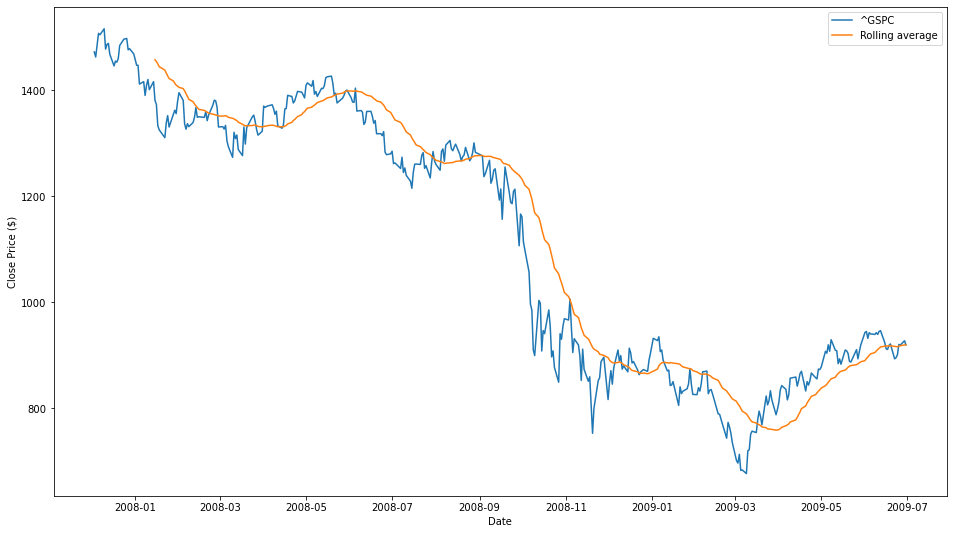

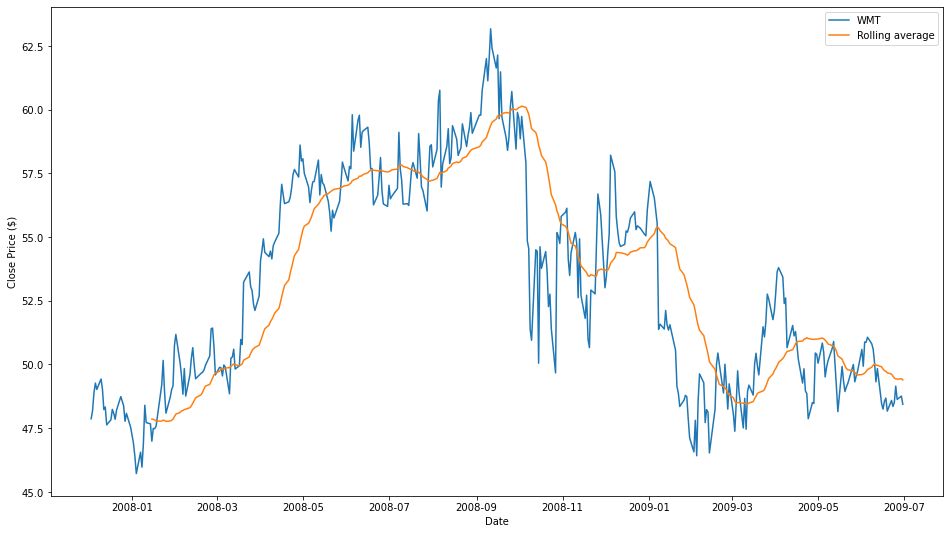

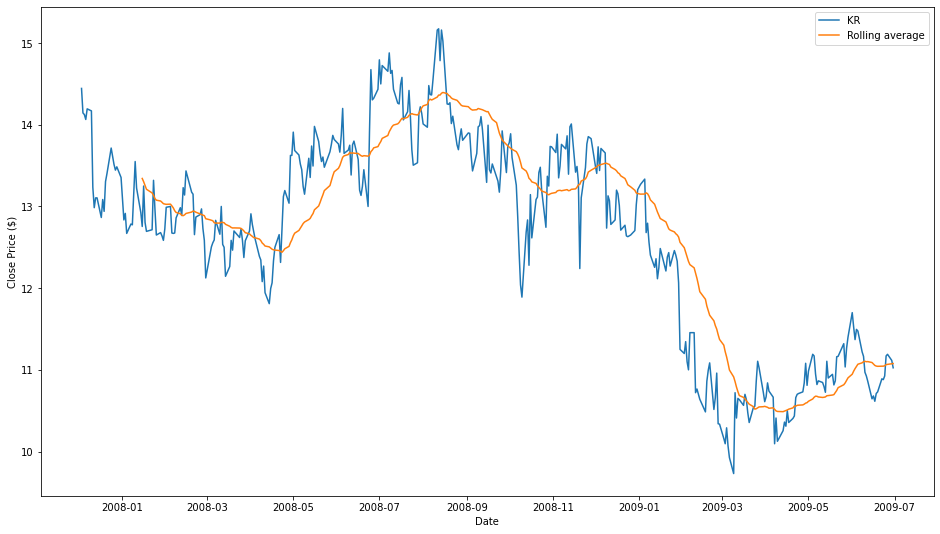

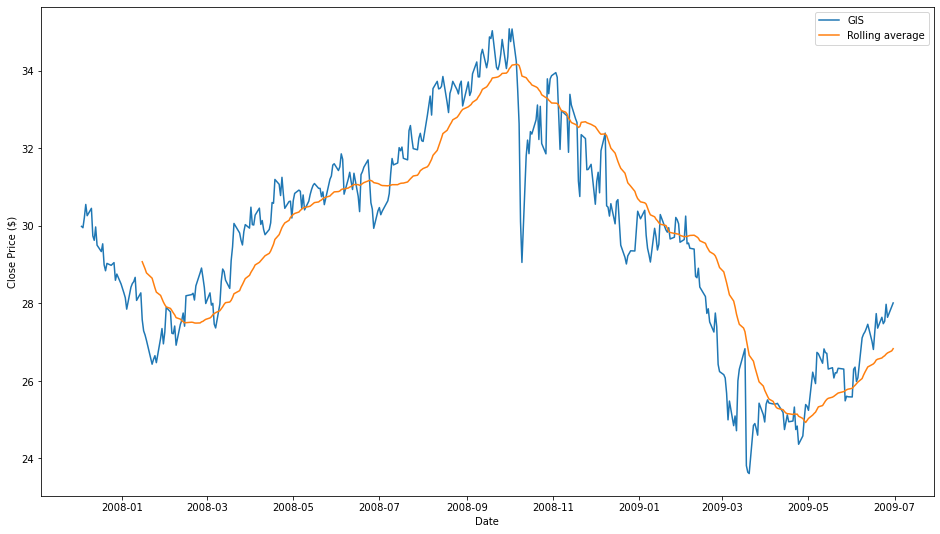

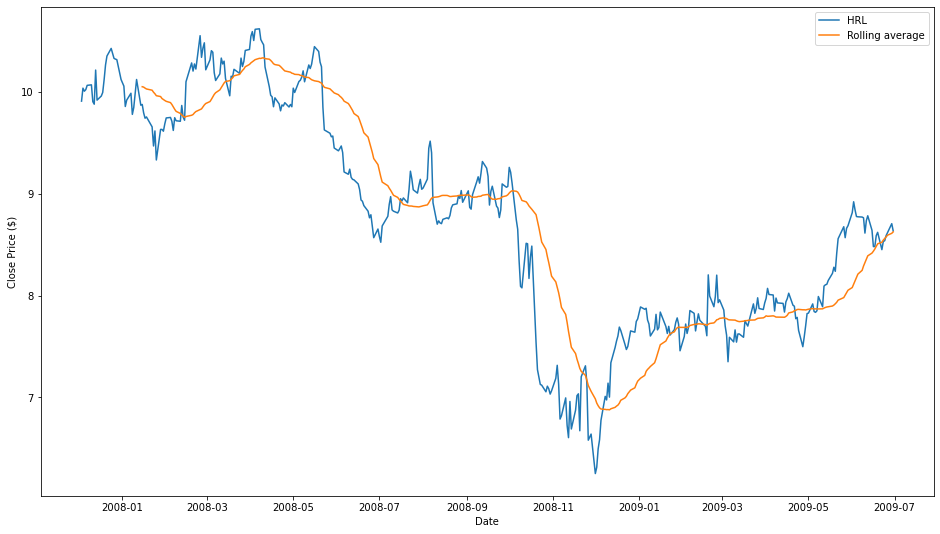

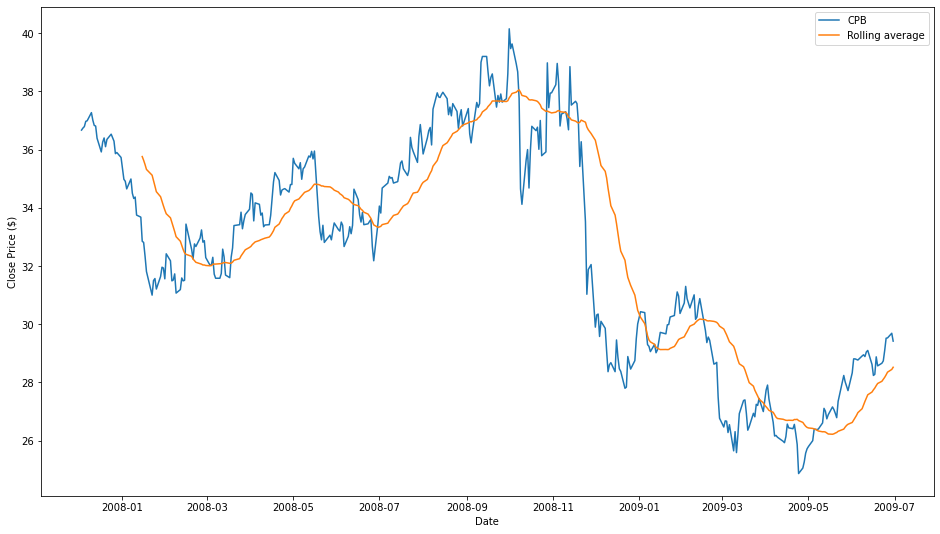

In [11]:
pickmydata(data_pack, "Close", 30)

Looking for trends, we can see that retail company stocks would hit a dip during the 
recession, but the precentage of the dip would be less extreme than that of the S&P.